# 3 - Correlation and Pattern Prediction

## prediction over weeks - prediction as soon as possible?

In [1]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
gem = pd.read_csv('task-and-exam-marks-in-groups.csv', delimiter=";", encoding="utf-8")
del gem["Unnamed: 0"]

In [3]:
pd.options.display.max_columns = 50

In [4]:
gem.head()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,hash2,a1,a2,a3,a4,a5,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree
0,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,0afdc45f7ee8e52ebf1afb2970e37b36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,1.0,tec,ba
1,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,d821cd2c7b995d4e3a75c64d25e53529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,inf,1.0,tec,ba
2,tutor1,1146.0,13.75,13.5,14.5,13.5,11.0,11.5,13.5,15.0,14.5,4.0,0.0,fa873577b8543ed8a6d7d8d7fe6ca546,7.0,7.0,8.5,8.0,6.0,7.0,8.5,52.0,3.3,2.0,1.0,inf,1.0,tec,ba
3,tutor3,19.0,13.00,6.5,7.5,9.0,3.5,4.5,5.5,0.0,0.0,0.0,0.0,e7c181a90d7161b4f885a69f6d426474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,inf,1.0,tec,ba
4,tutor5,5012.0,14.00,11.5,12.5,14.5,8.0,7.0,13.5,6.5,8.5,14.0,0.0,e2be9ece8b482afb4717e4e13907a525,4.0,7.0,7.0,8.5,6.5,1.5,4.0,38.5,5.0,4.0,0.0,inf,3.0,tec,ba


## Preparation of Dataset

In [5]:
learn = gem.copy()

In [6]:
del learn["hash2"]
del learn["a1"]
del learn["a2"]
del learn["a3"]
del learn["a4"]
del learn["a5"]
del learn["a6"]
del learn["a7"]
del learn["note"]
del learn["punkte"]
del learn["student_id"]

In [7]:
target = learn["pass"]

In [8]:
del learn["pass"]

In [9]:
del learn["team_id"]

In [10]:
learn.head()

,tutor,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,subject,semester,faculty,degree
0,tutor2,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,inf,1.0,tec,ba
1,tutor2,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,inf,1.0,tec,ba
2,tutor1,13.75,13.5,14.5,13.5,11.0,11.5,13.5,15.0,14.5,4.0,0.0,inf,1.0,tec,ba
3,tutor3,13.00,6.5,7.5,9.0,3.5,4.5,5.5,0.0,0.0,0.0,0.0,inf,1.0,tec,ba
4,tutor5,14.00,11.5,12.5,14.5,8.0,7.0,13.5,6.5,8.5,14.0,0.0,inf,3.0,tec,ba


## Preparation of Evaluation

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def confusion_matrix_report(y_true, y_pred):
	cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
	column_width = max([len(str(x)) for x in labels] + [5])
	report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
	report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
	for i, label1 in enumerate(labels):
		report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
	return report

In [12]:
def evaluate(model, X_test, y_test):
    prediction = model.predict(X_test)
    y_pred = X_test.assign(prediction = prediction)
    y_pred = y_pred.assign(true = y_test)
    print(confusion_matrix_report(y_pred["true"], y_pred["prediction"]))
    print(accuracy_score(y_pred["true"], y_pred["prediction"]))
    print(classification_report(y_pred["true"], y_pred["prediction"]))

## Data Preparation

In [13]:
learn.columns

Index(['tutor', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10',
       'b11', 'subject', 'semester', 'faculty', 'degree'],
      dtype='object')

In [14]:
learn_only = learn.copy()
del learn_only["faculty"]
del learn_only["tutor"]
del learn_only["subject"]
learn_only = pd.get_dummies(learn_only)
del learn_only["degree_ext"]
learn_only = learn_only.replace(np.nan, "0")
learn_only.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,semester,degree_ba,degree_ma
0,10,6.5,11.5,13,8.5,8,10.5,12.5,7,13,0,1,1,0
1,10,6.5,11.5,13,8.5,8,10.5,12.5,7,13,0,1,1,0
2,13.75,13.5,14.5,13.5,11,11.5,13.5,15,14.5,4,0,1,1,0
3,13,6.5,7.5,9,3.5,4.5,5.5,0,0,0,0,1,1,0
4,14,11.5,12.5,14.5,8,7,13.5,6.5,8.5,14,0,3,1,0


In [15]:
week1 = learn_only.copy()
del week1["b2"]
del week1["b3"]
del week1["b4"]
del week1["b5"]
del week1["b6"]
del week1["b7"]
del week1["b8"]
del week1["b9"]
del week1["b10"]
del week1["b11"]

In [16]:
week2 = learn_only.copy()
del week2["b3"]
del week2["b4"]
del week2["b5"]
del week2["b6"]
del week2["b7"]
del week2["b8"]
del week2["b9"]
del week2["b10"]
del week2["b11"]

In [17]:
week3 = learn_only.copy()
del week3["b4"]
del week3["b5"]
del week3["b6"]
del week3["b7"]
del week3["b8"]
del week3["b9"]
del week3["b10"]
del week3["b11"]

In [18]:
week4 = learn_only.copy()
del week4["b5"]
del week4["b6"]
del week4["b7"]
del week4["b8"]
del week4["b9"]
del week4["b10"]
del week4["b11"]

In [19]:
week5 = learn_only.copy()
del week5["b6"]
del week5["b7"]
del week5["b8"]
del week5["b9"]
del week5["b10"]
del week5["b11"]

In [20]:
week6 = learn_only.copy()
del week6["b7"]
del week6["b8"]
del week6["b9"]
del week6["b10"]
del week6["b11"]

In [21]:
week7 = learn_only.copy()
del week7["b8"]
del week7["b9"]
del week7["b10"]
del week7["b11"]

In [22]:
week8 = learn_only.copy()
del week8["b9"]
del week8["b10"]
del week8["b11"]

In [23]:
week9 = learn_only.copy()
del week9["b10"]
del week9["b11"]

In [24]:
week10 = learn_only.copy()
del week10["b11"]

In [25]:
week11 = learn_only.copy()

In [26]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(week1, target, test_size=0.15, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(week2, target, test_size=0.15, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(week3, target, test_size=0.15, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(week4, target, test_size=0.15, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(week5, target, test_size=0.15, random_state=42)
X_train6, X_test6, y_train6, y_test6 = train_test_split(week6, target, test_size=0.15, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split(week7, target, test_size=0.15, random_state=42)
X_train8, X_test8, y_train8, y_test8 = train_test_split(week8, target, test_size=0.15, random_state=42)
X_train9, X_test9, y_train9, y_test9 = train_test_split(week9, target, test_size=0.15, random_state=42)
X_train10, X_test10, y_train10, y_test10 = train_test_split(week10, target, test_size=0.15, random_state=42)
X_train11, X_test11, y_train11, y_test11 = train_test_split(week11, target, test_size=0.15, random_state=42)

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [28]:
# for estimators in [10, 20, 30, 40, 50, 60]:
#     for depth in [1,2,3,4,5,6,7,8,9]:    
#         rf_model =  RandomForestClassifier(max_depth=depth, n_estimators=estimators)
#         cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#         acc_each_split = cross_val_score(rf_model, X_train1, y_train1, cv=cross_val, scoring='accuracy')
#         rf_model.fit(X_train1, y_train1)
#         print("tree with depth= {} and estimators= {} has accuracy {}".format(depth, estimators, acc_each_split.mean()))

In [29]:
depth = 9
estimator = 80

In [30]:
rf_model1 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model1.fit(X_train1,y_train1)
evaluate(rf_model1, X_test1, y_test1)

      Prediction
       0.0   1.0
  0.0   15     8
  1.0    6     9

0.631578947368
             precision    recall  f1-score   support

        0.0       0.71      0.65      0.68        23
        1.0       0.53      0.60      0.56        15

avg / total       0.64      0.63      0.63        38



In [31]:
rf_model2 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model2.fit(X_train2,y_train2)
evaluate(rf_model2, X_test2, y_test2)

      Prediction
       0.0   1.0
  0.0   19     4
  1.0    3    12

0.815789473684
             precision    recall  f1-score   support

        0.0       0.86      0.83      0.84        23
        1.0       0.75      0.80      0.77        15

avg / total       0.82      0.82      0.82        38



In [32]:
rf_model3 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model3.fit(X_train3,y_train3)
evaluate(rf_model3, X_test3, y_test3)

      Prediction
       0.0   1.0
  0.0   18     5
  1.0    4    11

0.763157894737
             precision    recall  f1-score   support

        0.0       0.82      0.78      0.80        23
        1.0       0.69      0.73      0.71        15

avg / total       0.77      0.76      0.76        38



In [33]:
rf_model4 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model4.fit(X_train4,y_train4)
evaluate(rf_model4, X_test4, y_test4)

      Prediction
       0.0   1.0
  0.0   17     6
  1.0    4    11

0.736842105263
             precision    recall  f1-score   support

        0.0       0.81      0.74      0.77        23
        1.0       0.65      0.73      0.69        15

avg / total       0.75      0.74      0.74        38



In [34]:
rf_model5 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model5.fit(X_train5,y_train5)
evaluate(rf_model5, X_test5, y_test5)

      Prediction
       0.0   1.0
  0.0   17     6
  1.0    2    13

0.789473684211
             precision    recall  f1-score   support

        0.0       0.89      0.74      0.81        23
        1.0       0.68      0.87      0.76        15

avg / total       0.81      0.79      0.79        38



In [35]:
rf_model6 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model6.fit(X_train6,y_train6)
evaluate(rf_model6, X_test6, y_test6)

      Prediction
       0.0   1.0
  0.0   17     6
  1.0    2    13

0.789473684211
             precision    recall  f1-score   support

        0.0       0.89      0.74      0.81        23
        1.0       0.68      0.87      0.76        15

avg / total       0.81      0.79      0.79        38



In [36]:
rf_model7 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model7.fit(X_train7,y_train7)
evaluate(rf_model7, X_test7, y_test7)

      Prediction
       0.0   1.0
  0.0   17     6
  1.0    3    12

0.763157894737
             precision    recall  f1-score   support

        0.0       0.85      0.74      0.79        23
        1.0       0.67      0.80      0.73        15

avg / total       0.78      0.76      0.77        38



In [37]:
rf_model8 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model8.fit(X_train8,y_train8)
evaluate(rf_model8, X_test8, y_test8)

      Prediction
       0.0   1.0
  0.0   17     6
  1.0    3    12

0.763157894737
             precision    recall  f1-score   support

        0.0       0.85      0.74      0.79        23
        1.0       0.67      0.80      0.73        15

avg / total       0.78      0.76      0.77        38



In [38]:
rf_model9 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model9.fit(X_train9,y_train9)
evaluate(rf_model9, X_test9, y_test9)

      Prediction
       0.0   1.0
  0.0   19     4
  1.0    3    12

0.815789473684
             precision    recall  f1-score   support

        0.0       0.86      0.83      0.84        23
        1.0       0.75      0.80      0.77        15

avg / total       0.82      0.82      0.82        38



In [39]:
rf_model10 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model10.fit(X_train10,y_train10)
evaluate(rf_model10, X_test10, y_test10)

      Prediction
       0.0   1.0
  0.0   19     4
  1.0    2    13

0.842105263158
             precision    recall  f1-score   support

        0.0       0.90      0.83      0.86        23
        1.0       0.76      0.87      0.81        15

avg / total       0.85      0.84      0.84        38



In [40]:
rf_model11 =  RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=180906)
rf_model11.fit(X_train11,y_train11)
evaluate(rf_model11, X_test11, y_test11)

      Prediction
       0.0   1.0
  0.0   19     4
  1.0    2    13

0.842105263158
             precision    recall  f1-score   support

        0.0       0.90      0.83      0.86        23
        1.0       0.76      0.87      0.81        15

avg / total       0.85      0.84      0.84        38



In [41]:
print("Week 1: ", accuracy_score(y_test1, rf_model1.predict(X_test1)))
print("Week 2: ", accuracy_score(y_test2, rf_model2.predict(X_test2)))
print("Week 3: ", accuracy_score(y_test3, rf_model3.predict(X_test3)))
print("Week 4: ", accuracy_score(y_test4, rf_model4.predict(X_test4)))
print("Week 5: ", accuracy_score(y_test5, rf_model5.predict(X_test5)))
print("Week 6: ", accuracy_score(y_test6, rf_model6.predict(X_test6)))
print("Week 7: ", accuracy_score(y_test7, rf_model7.predict(X_test7)))
print("Week 8: ", accuracy_score(y_test8, rf_model8.predict(X_test8)))
print("Week 9: ", accuracy_score(y_test9, rf_model9.predict(X_test9)))
print("Week 10: ", accuracy_score(y_test10, rf_model10.predict(X_test10)))
print("Week 11: ", accuracy_score(y_test11, rf_model11.predict(X_test11)))

Week 1:  0.631578947368
Week 2:  0.815789473684
Week 3:  0.763157894737
Week 4:  0.736842105263
Week 5:  0.789473684211
Week 6:  0.789473684211
Week 7:  0.763157894737
Week 8:  0.763157894737
Week 9:  0.815789473684
Week 10:  0.842105263158
Week 11:  0.842105263158


In [42]:
acc = pd.Series([accuracy_score(y_test1, rf_model1.predict(X_test1)), 
                accuracy_score(y_test2, rf_model2.predict(X_test2)),
                accuracy_score(y_test3, rf_model3.predict(X_test3)),
                accuracy_score(y_test4, rf_model4.predict(X_test4)),
                accuracy_score(y_test5, rf_model5.predict(X_test5)),
                accuracy_score(y_test6, rf_model6.predict(X_test6)),
                accuracy_score(y_test7, rf_model7.predict(X_test7)),
                accuracy_score(y_test8, rf_model8.predict(X_test8)),
                accuracy_score(y_test9, rf_model9.predict(X_test9)),
                accuracy_score(y_test10, rf_model10.predict(X_test10)),
                accuracy_score(y_test11, rf_model11.predict(X_test11))])

In [43]:
week = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [44]:
df = pd.DataFrame({"week" : week, "accuracy" : acc})

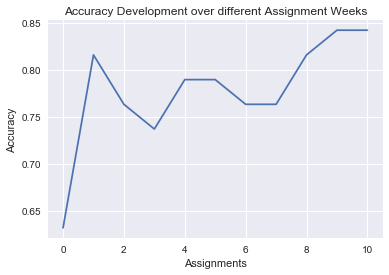

In [45]:
#plt.hist(df["week"])
plt.plot(df["accuracy"])
plt.xlabel('Assignments')
plt.ylabel('Accuracy')
plt.title('Accuracy Development over different Assignment Weeks')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

In [46]:
importance =  rf_model2.feature_importances_
importance = pd.DataFrame(importance, index=X_train2.columns, 
                          columns=["Importance"])
importance

,Importance
b1,0.239993
b2,0.378333
semester,0.300202
degree_ba,0.045158
degree_ma,0.036315
